In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a file path
census_data = pd.read_csv("../Resources/census_data_sh_2019_2022.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,3283.0,2604.0,13.0,6.0,0.0,0.0,623.0,37.0,0.0,3283.0,...,27.0,6.0,0.0,0.0,1233.0,63.0,10552.0,72.0,601,2019
1,9528.0,8298.0,239.0,0.0,0.0,0.0,238.0,753.0,553.0,8975.0,...,341.0,12.0,0.0,0.0,375.0,1124.0,18653.0,72.0,602,2019
2,11118.0,9141.0,394.0,22.0,26.0,0.0,1381.0,154.0,86.0,10998.0,...,758.0,42.0,47.0,0.0,2710.0,232.0,23691.0,72.0,603,2019
3,1470.0,717.0,6.0,10.0,0.0,0.0,716.0,21.0,4.0,1466.0,...,6.0,10.0,0.0,0.0,963.0,29.0,4185.0,72.0,606,2019
4,6758.0,5612.0,127.0,0.0,0.0,0.0,458.0,561.0,244.0,6493.0,...,173.0,0.0,0.0,0.0,643.0,744.0,12204.0,72.0,610,2019


In [4]:
# Check the total owner-occupied units
total_owner_occupied_units = census_data[census_data['year'] == 2019]['Owner_Occupied_Units'].sum()

# Check the number of white homeowners
white_homeowners = census_data[census_data['year'] == 2019]['Owner_White_alone'].sum()

# Calculate the percentage
percent_white_homeowners_2019 = (white_homeowners / total_owner_occupied_units) * 100
print(f"Percent White Homeowners in 2019: {percent_white_homeowners_2019}%")


Percent White Homeowners in 2019: 82.85954851641586%


In [3]:
# Householder race and ownership over time
# Compare trends over time: 
# Calculate owner-occupancy rate
census_data['owner_occupancy_rate'] = (census_data['Owner_Occupied_Units'] / census_data['Total_Occupied_Units']) * 100

# Group by year and calculate the mean owner-occupancy rate for each year
owner_occupancy_by_year = census_data.groupby('year')['owner_occupancy_rate'].mean()
owner_occupancy_by_year


year
2019    73.357364
2020    73.775526
2021    74.226629
2022    74.465813
Name: owner_occupancy_rate, dtype: float64

In [4]:
# Calculate the percentage of White householders who are homeowners
census_data['percent_white_homeowners'] = (census_data['Owner_White_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_white_homeowners_by_year = census_data.groupby('year')['percent_white_homeowners'].mean()
percent_white_homeowners_by_year


year
2019    87.699679
2020    86.637880
2021    85.557543
2022    84.310066
Name: percent_white_homeowners, dtype: float64

In [5]:
# Calculate the percentage of black householders who are homeowners
census_data['percent_black_homeowners'] = (census_data['Owner_Black_African_American_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_black_homeowners_by_year = census_data.groupby('year')['percent_black_homeowners'].mean()
percent_black_homeowners_by_year


year
2019    5.904432
2020    5.831772
2021    5.759192
2022    5.757761
Name: percent_black_homeowners, dtype: float64

In [6]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Asian_homeowners'] = (census_data['Owner_Asian_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Asian_homeowners_by_year = census_data.groupby('year')['percent_Asian_homeowners'].mean()
percent_Asian_homeowners_by_year

year
2019    1.905514
2020    1.983701
2021    2.017108
2022    2.071310
Name: percent_Asian_homeowners, dtype: float64

In [7]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Hawaiian_homeowners'] = (census_data['Owner_Native_Hawaiian_Other_Pacific_Islander_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Hawaiian_homeowners_by_year = census_data.groupby('year')['percent_Hawaiian_homeowners'].mean()
percent_Hawaiian_homeowners_by_year

year
2019    0.061568
2020    0.064743
2021    0.069540
2022    0.071647
Name: percent_Hawaiian_homeowners, dtype: float64

In [8]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Am_Indian_homeowners'] = (census_data['Owner_American_Indian_Alaska_Native_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Am_Indian_homeowners_by_year = census_data.groupby('year')['percent_Am_Indian_homeowners'].mean()
percent_Am_Indian_homeowners_by_year

year
2019    1.592303
2020    1.584339
2021    1.562799
2022    1.568337
Name: percent_Am_Indian_homeowners, dtype: float64

In [9]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Some_other_race_alone'] = (census_data['Owner_Some_other_race_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Other_homeowners_by_year = census_data.groupby('year')['percent_Some_other_race_alone'].mean()
percent_Other_homeowners_by_year

year
2019    1.431407
2020    1.589310
2021    1.797092
2022    2.021079
Name: percent_Some_other_race_alone, dtype: float64

In [10]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Two_or_more_homeowners'] = (census_data['Owner_Two_or_more_races'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Two_or_more_homeowners_by_year = census_data.groupby('year')['percent_Two_or_more_homeowners'].mean()
percent_Two_or_more_homeowners_by_year

year
2019    1.405097
2020    2.308255
2021    3.236726
2022    4.199799
Name: percent_Two_or_more_homeowners, dtype: float64

In [11]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_White_no_Hisp_homeowners'] = (census_data['Owner_White_no_Hispanic_or_Latino'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_White_no_Hisp_homeowners_by_year = census_data.groupby('year')['percent_White_no_Hisp_homeowners'].mean()
percent_White_no_Hisp_homeowners_by_year

year
2019    82.981059
2020    82.405336
2021    81.906558
2022    81.261772
Name: percent_White_no_Hisp_homeowners, dtype: float64

In [12]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Hisp_homeowners'] = (census_data['Owner_Hispanic_Latino'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Hisp_homeowners_by_year = census_data.groupby('year')['percent_Hisp_homeowners'].mean()
percent_Hisp_homeowners_by_year

year
2019    6.521556
2020    6.725891
2021    6.902655
2022    7.105219
Name: percent_Hisp_homeowners, dtype: float64

In [13]:
# Assuming you have the correct Series names and they are properly aligned by 'year' index
summary_df = pd.DataFrame({
    'Percent White Homeowners': percent_white_homeowners_by_year,
    'Percent Black Homeowners': percent_black_homeowners_by_year,
    'Percent Am Ind/Al Nat Homeowners': percent_Am_Indian_homeowners_by_year,
    'Percent Asian Homeowners': percent_Asian_homeowners_by_year,
    'Percent Hawaiian/Pac Isl Homeowners': percent_Hawaiian_homeowners_by_year,
    'Percent Other Homeowners': percent_Other_homeowners_by_year,
    'Percent Two or More Homeowners': percent_Two_or_more_homeowners_by_year,
    'Percent White/Non Hispanic Homeowners': percent_White_no_Hisp_homeowners_by_year,
    'Percent Hispanic Homeowners': percent_Hisp_homeowners_by_year
})

# Optional: Reset index if you want 'Year' as a column for easier plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'year'}, inplace=True)


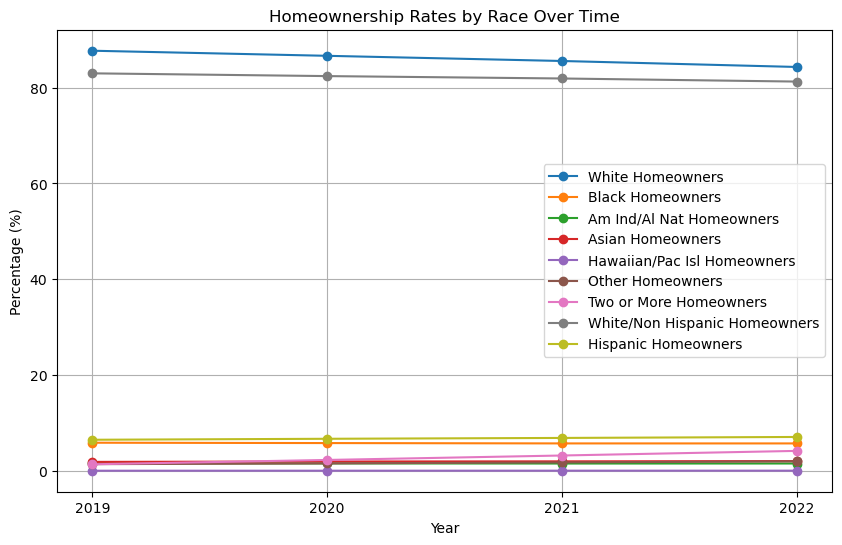

In [14]:
# Assuming 'summary_df' is already correctly formatted and 'year' is a column
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Plot each racial group's homeownership trend
plt.plot(summary_df['year'], summary_df['Percent White Homeowners'], label='White Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Black Homeowners'], label='Black Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Am Ind/Al Nat Homeowners'], label='Am Ind/Al Nat Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Asian Homeowners'], label='Asian Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Hawaiian/Pac Isl Homeowners'], label='Hawaiian/Pac Isl Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Other Homeowners'], label='Other Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Two or More Homeowners'], label='Two or More Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent White/Non Hispanic Homeowners'], label='White/Non Hispanic Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Hispanic Homeowners'], label='Hispanic Homeowners', marker='o')

# Set x-axis ticks
years = summary_df['year'].unique()  # Extract years from the DataFrame
plt.xticks(years, labels=years)  # Set x-axis ticks to show only the years in your data

# Adding titles and labels
plt.title('Homeownership Rates by Race Over Time')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Percentage (%)')  # Y-axis label

# Display a legend to identify the lines
plt.legend()

# Optionally, display a grid
plt.grid(True)


plt.savefig('homeowner_race_line_chart19_22.png', format='png', dpi=300)

# Show the plot
plt.show()
